Importing libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import peakutils
import pandas as pd
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
sns.set_style("whitegrid")

Data obtained from image analysis of the coverage profile evolution:

In [11]:
res2 = [7, 13, 29]
res3 = [27, 33, 49]
coveragegrd = np.array([0.05127222, 0.04039425, 0.03144163, 0.03515855, 0.03844363,0.04134744, 0.04369093, 0.04433446, 0.04355295, 0.04288624,0.04296102, 0.0446378 , 0.04775437, 0.05112371, 0.04435553,0.0336366 , 0.02826186, 0.02138414, 0.01729648, 0.01476762,0.012995  , 0.01348371, 0.01136141, 0.00916433, 0.00948873,0.0098026 , 0.00969727, 0.00993742, 0.01134561, 0.01373333,0.01317721, 0.01037662, 0.00957404, 0.00942764, 0.00806263,0.00702518, 0.00681769, 0.00638059, 0.00597193, 0.00594033,0.00559908, 0.0049408 , 0.00486075, 0.0046659 , 0.00439732,0.00425092, 0.00408872, 0.00384542, 0.00379275, 0.0036927 ,0.00369796, 0.00348626, 0.00271633, 0.00210861, 0.00175893,0.00172838, 0.00176314, 0.00171153, 0.00181054, 0.00156829,0.00091211, 0.00075623, 0.00081206, 0.00077203, 0.0008268 ,0.00088789, 0.00072253, 0.00028754, 0.        , 0.        ,0.        , 0.        , 0.        , 0.        , 0.        ,0.        , 0.        , 0.        , 0.        , 0.        ,0.        , 0.        , 0.        , 0.        , 0.        ,0.        , 0.        , 0.        , 0.        , 0.        ,0.        , 0.        , 0.        , 0.        , 0.        ,0.        , 0.        , 0.        , 0.        , 0.        ,0.        , 0.        , 0.        , 0.        , 0.        ,0.        , 0.        , 0.        , 0.        , 0.        ,0.        , 0.        , 0.        , 0.        , 0.        ,0.        , 0.        , 0.        , 0.        , 0.        ,0.        ])

Retrieving data from coverages computed during the simulation and processed in another notebook:

In [12]:
df = pd.read_csv('./../coverages/df_2c_1.csv')

Computing peaks:

In [13]:
pks = peakutils.indexes(df['slope_2'],thres=0.3)

Comparison between coverage evolution with the 2 mol/L threshold for both 2d image analysis and direct volume computation:

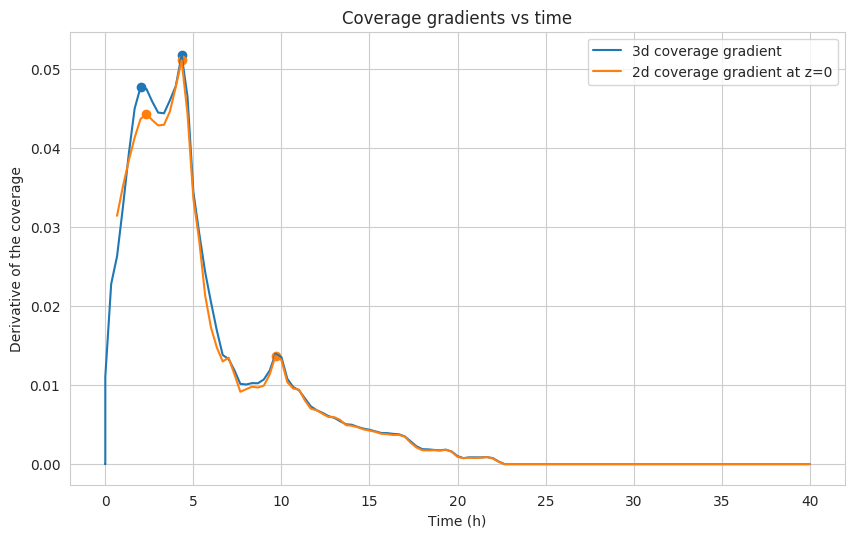

In [14]:
fig = plt.figure(figsize=(10,6),dpi=100)
plt.plot(df['time_hours'],df['slope_2'])
plt.plot(df['time_hours'].iloc[22:],coveragegrd[2:])
plt.legend(['3d coverage gradient','2d coverage gradient at z=0'])
plt.scatter(df['time_hours'].iloc[pks],df['slope_2'].iloc[pks])
plt.scatter(df['time_hours'].iloc[res3],coveragegrd[res2])
plt.title('Coverage gradients vs time')
plt.ylabel('Derivative of the coverage')
plt.xlabel('Time (h)')
plt.show()

Possible functions that may be used to fit the curves above:

Here I am trying to fit the coverage profile curve with three lognormals and a constant:

In [18]:
def lognormals(x, a, b, c, d, e, f, g, h , i, j,k,l,m):
    return a * np.exp(-b * np.square(np.log(x)-c)) + d * np.exp(-e * np.square(np.log(x)-f)) + g * np.exp(-h * np.square(np.log(x)-i)) + m




popt, pcov = curve_fit(lognormals,
                       df['time_hours'],
                       df['slope_2'],maxfev=1000000)#,

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Plotting the three lognormals determined during the fitting procedure:

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


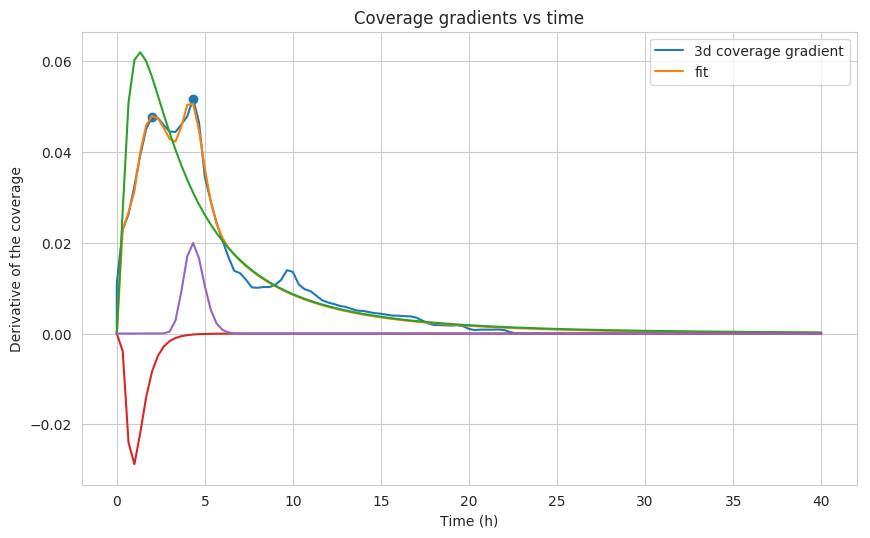

In [72]:
fig = plt.figure(figsize=(10,6),dpi=100)
plt.plot(df['time_hours'],df['slope_2'])
#plt.xscale('logit')
#plt.plot(df['time_hours'].iloc[22:],coveragegrd[2:])
plt.plot(df['time_hours'],lognormals(df['time_hours'],*popt))
for i in range(0,9,3):
    plt.plot(df['time_hours'],lognormal(df['time_hours'],*popt[[n+i for n in range(0,3)]]))
plt.legend(['3d coverage gradient','fit'])
plt.scatter(df['time_hours'].iloc[pks],df['slope_2'].iloc[pks])
#plt.xlim([-0.001,30])
#plt.scatter(df['time_hours'].iloc[res3],coveragegrd[res2])
plt.title('Coverage gradients vs time')
plt.ylabel('Derivative of the coverage')
plt.xlabel('Time (h)')
plt.show()

In [27]:
fit_data = lognormals(df['time_hours'],*popt)
real_data = df['slope_2']
tot_data = pd.concat([fit_data,real_data],axis=1)
tot_data.rename(columns={'time_hours':'fit','slope_2':'real'}, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [77]:
chi, p = stats.chisquare(tot_data['fit'],tot_data['real'])
print("Computed chi squared statistic: {} || p-value: {}".format(chi,p) )

Computed chi squared statistic: inf || p-value: 0.0


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:4554: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


A simple chi squared test here won't work: some of the expected values (the ones computed from the CFD simulation are zero). By definition of the Chi squared statistic, that implies division by zero, which ruins the whole idea of assessing fit quality using the chi squared. So instead of simply it by the expected values (which are zero), we divide the whole thing by the variance of the of the residuals. All of that manually, using pandas:

In [78]:
tot_data['diff'] = np.square(tot_data['real']-tot_data['fit'])
tot_data['norm_diff'] = tot_data['diff']/np.square(np.sqrt(tot_data['diff']).std())

The degrees of freedom:

In [79]:
dg_freedom = tot_data.shape[0]-1

And finally, the reduced chi squared statistic:

In [80]:
red_chi_squared = tot_data['norm_diff'].sum()/dg_freedom
chi_squared = tot_data['norm_diff'].sum()
print("Reduced chi squared statistic: {}".format(round(red_chi_squared,2)))

Reduced chi squared statistic: 1.47


The value above has to be equal or less than one for a good fit. Refer to chapter 12 of An Introduction to Error Analysis: The Study of Uncertainties in Physical Measurements by John Robert Taylor for a good explanation on this step. The weak link in the above computation is certainly the division by the variance of residuals. Not sure if I should do this. Need to check that later on.


Here I try to do the chi squared test manually, I check the statistic value, and check whether it is above the value associated with a significance of 0.05:

In [52]:
chi_squared

205.35687286680596

In [84]:
stats.chi2.cdf(205,120)

0.9999978343902061

As we can see, it is well above the significance, implying the null hypothesis is not valid here, and the procedure I tried above generated a bad fit. Below is the chi squared distribution for the number of degrees of freedom:

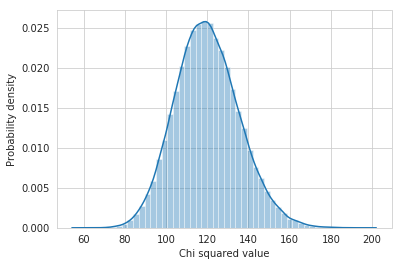

In [85]:
r = stats.chi2.rvs(120, size=100000)
sns.distplot(r)
plt.xlabel('Chi squared value')
plt.ylabel('Probability density')
plt.show()